Importing Libraries to be used throughout the notebook

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# https://www.kaggle.com/c/digit-recognizer

Importing Dataset and Extracting Features and Labels

In [30]:
train_data = pd.read_csv("drive/MyDrive/Collab DataSets/Digit_train.csv")
dataset = train_data
X = dataset.drop(["label"], axis= 1).values
Y = dataset[["label"]].values

Splitting Up Dataset For Training and Testing


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

Reshaping the data to make it ready for visualization

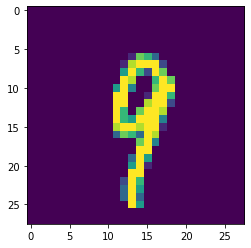

In [32]:
X_test_visualize = X_train.reshape(33600, 28, 28)

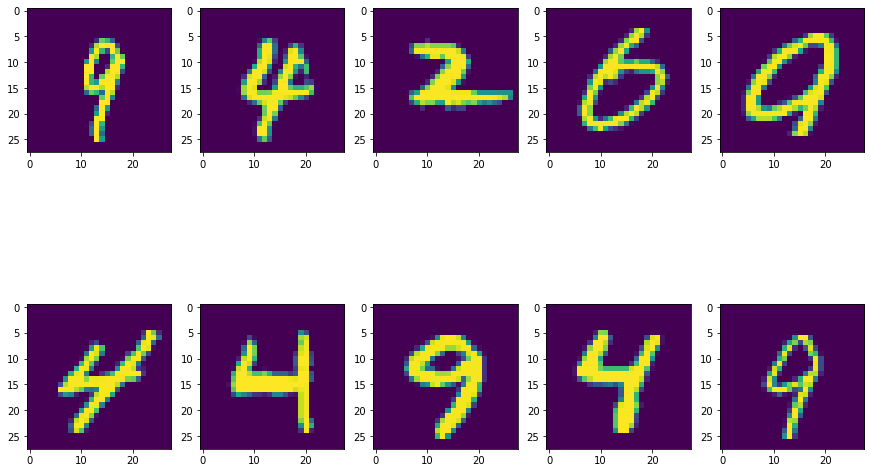

In [33]:
plt.figure(figsize=[15,10])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test_visualize[i])

Training The Support Vector Machine

In [35]:
model = svm.SVC()
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
Y_predicted = model.predict(X_test)

In [57]:
print(accuracy_score(Y_test, Y_predicted))

0.9767857142857143


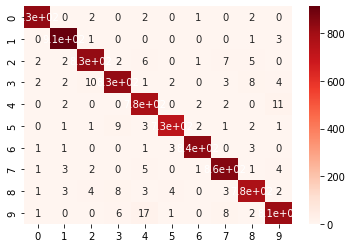

In [56]:
sns.heatmap(confusion_matrix(Y_test, Y_predicted), annot=True, cmap="Reds")

Decision Trees Turn

In [38]:
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
dt_predicted = dt_classifier.predict(X_test)

In [58]:
print(accuracy_score(Y_test,dt_predicted))

[[760   1   9   9  14   8  19   3  11   5]
 [  0 878   7   5   2   2   3   7   8   6]
 [ 10  14 715  26   7  14  14  20  20  15]
 [  5   7  27 691   9  32   5  19  39  28]
 [  5   9  14   5 682  12  10   4  21  39]
 [  7   6  10  41  10 612  16   8  21  17]
 [  7   6  13   4  12  24 760   2  17   4]
 [  4   2  18  13   9   2   1 789   7  31]
 [ 11  12  29  46  21  35  12   8 613  17]
 [  9   1   5  10  40  14   6  22  26 715]]


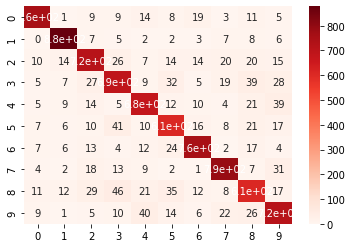

In [59]:
sns.heatmap(confusion_matrix(Y_test, dt_predicted), annot=True, cmap="Reds")

Give A Chance To KNN

In [41]:
kn_classifier = KNeighborsClassifier(n_neighbors=5)
kn_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
knn_predicted = kn_classifier.predict(X_test)

In [61]:
print(accuracy_score(Y_test, knn_predicted))

0.9667857142857142


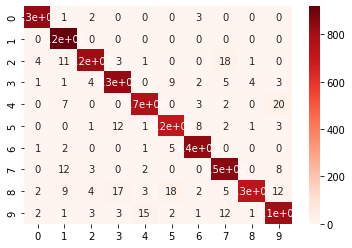

In [62]:
sns.heatmap(confusion_matrix(Y_test, knn_predicted), annot=True, cmap="Reds")

To Get The Best N_neighbors 

In [44]:
#Been Commented Out To Save Some Time
# validates = []

# for i in range(1, 50):
#   knn = KNeighborsClassifier(n_neighbors=i)
#   scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring="accuracy")
#   validates.append(scores.mean())

Gaussian Classifier

In [45]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
gnb_predicted = gnb_classifier.predict(X_test)

In [63]:
print(accuracy_score(Y_test, gnb_predicted))

0.5589285714285714


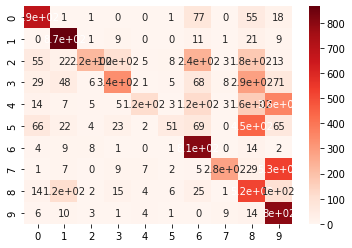

In [64]:
sns.heatmap(confusion_matrix(Y_test, gnb_predicted), annot=True, cmap="Reds")

Random Forrest CLassifier

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1)
rf_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rf_predicted = rf_classifier.predict(X_test)

In [65]:
print(accuracy_score(Y_test, rf_predicted))

0.9470238095238095


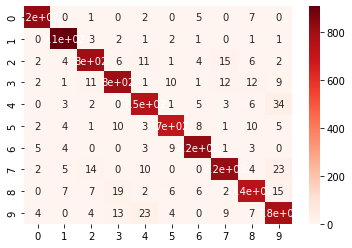

In [66]:
sns.heatmap(confusion_matrix(Y_test, rf_predicted), annot=True, cmap="Reds")

HyperParameter Tuning For Random Forrest

In [51]:
# param_grids = {
#     "max_depth" : [1, 5, 10, 15],
#     "n_estimators" : [10, 100, 500, 1000],
#     "min_samples_leaf" : [1,2,3,4,5,10,15,20,30,40,50]
# }
# grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs= -1, max_features="sqrt"), param_grid= param_grids, cv = 10 )

# grid_search.fit(X_train, Y_train)

In [69]:
Test_data = pd.read_csv("drive/MyDrive/Collab DataSets/Digit_test.csv")

In [71]:
final_model = svm.SVC()
final_model.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
test = Test_data.values

In [75]:
final_prediction = model.predict(test)